In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [3]:
dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [5]:
dataset['gender']=le.fit_transform(dataset['gender'])

In [6]:
dataset['smoking_history']=le.fit_transform(dataset['smoking_history'])

In [7]:
dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


In [9]:

X=dataset[['gender','age','hypertension','heart_disease','smoking_history','bmi','HbA1c_level','blood_glucose_level']]

In [10]:
Y=dataset[['diabetes']]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split (X,Y,test_size=0.22,random_state=62)

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [14]:
clf = DecisionTreeClassifier(max_depth=5, random_state=62)

In [15]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, random_state=62)

In [20]:
Y_pred=clf.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have Y_test and Y_pred
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     20125
           1       1.00      0.67      0.80      1875

    accuracy                           0.97     22000
   macro avg       0.98      0.83      0.89     22000
weighted avg       0.97      0.97      0.97     22000

Confusion Matrix:
[[20125     0]
 [  624  1251]]


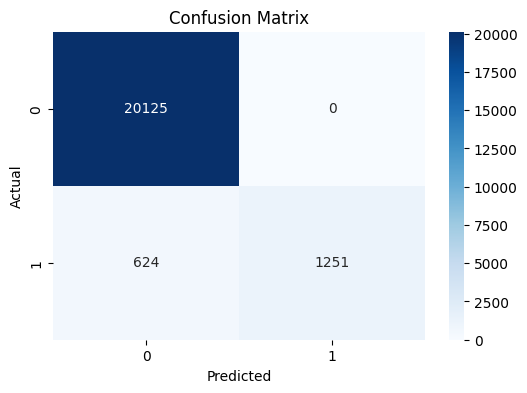

In [22]:
# Plot confusion matrix heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()